# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lubna Mawaddah
- **Email:** lubnamawaddah01@gmail.com
- **ID Dicoding:** lubnamawaddah

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penyewaan sepeda berkembang dari tahun 2011 ke 2012? Apakah jumlah penyewaan meningkat atau menurun?
2. Bagaimana pengaruh faktor musim dan kondisi cuaca terhadap permintaan sewa sepeda?
3. Bagaimana penyewaan pada hari libur dibandingkan dengan hari kerja atau akhir pekan?
4. Apakah terdapat perbedaan pola penyewaan sepeda antara pengguna casual dan pengguna terdaftar berdasarkan jenis hari, seperti hari kerja, akhir pekan, dan hari libur?
5. Pada jam berapa permintaan penyewaan sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai tabel day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai tabel hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data pada kolom "dteday" tidak sesuai, maka tipe data tersebut perlu diubah dari object menjadi datetime
- Tabel day_df dan hour_df tidak memiliki missing value dan data duplikat
- Tidak ada masalah pada parameter statistik dari kedua tabel tersebut

### Cleaning Data

Pada tahap ini, pembersihan data lebih banyak dilakukan pada tabel day_df, sementara tabel hour_df tidak banyak diproses karena tabel tersebut tidak banyak diperlukan dalam proyek ini.

**Menghapus beberapa kolom yang tidak diperlukan**

- instant: kolom ini hanya berisi record index dan tidak diperlukan
- temp, atemp, hum, windspeed: kolom-kolom tersebut dihapus karena tidak diperlukan dan tidak relevan dengan pertanyaan bisnis yang sudah ditetapkan

In [12]:
drop_col = ['instant', 'temp', 'atemp', 'hum', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

**Mengubah tipe data kolom**

Tipe data kolom dteday diubah dari object menjadi datetime

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 62.9 KB


**Mengubah beberapa nama kolom agar menjadi lebih jelas**

- dteday -> date
- yr -> year
- mnth -> month
- hr -> hour
- weathersit -> weather
- cnt -> count

In [14]:
day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "cnt" : "count"}, inplace=True
)

In [15]:
hour_df.rename(columns={
    "hr" : "hour",
    "cnt" : "count"}, inplace=True
)

In [16]:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [17]:
hour_df.head()

,instant,dteday,season,yr,mnth,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengubah angka pada kolom season, year, month, weekday, dan weather menjadi sebuah keterangan yang merepresentasikan angka tersebut sesuai dengan deskripsi dataset**

In [18]:
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})

day_df['month'] = pd.Categorical(
    day_df['month'].map({
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }),
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True
)

day_df['weekday'] = pd.Categorical(
    day_df['weekday'].map({
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    }),
    categories=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
    ordered=True
)

day_df['weather'] = day_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
})

**Membuat kolom baru bernama day_type untuk mengkategorikan jenis hari berdasarkan hari libur, hari kerja, dan akhir pekan**

In [19]:
def get_day_type(row):
    if row['holiday'] == 1:
        return 'Holiday'
    elif row['workingday'] == 1:
        return 'Working Day'
    else:
        return 'Weekend'

day_df['day_type'] = day_df.apply(get_day_type, axis=1)

In [20]:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather,casual,registered,count,day_type
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,331,654,985,Weekend
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,131,670,801,Weekend
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,120,1229,1349,Working Day
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,108,1454,1562,Working Day
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,82,1518,1600,Working Day


In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   year        731 non-null    object        
 3   month       731 non-null    category      
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    object        
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  count       731 non-null    int64         
 11  day_type    731 non-null    object        
dtypes: category(2), datetime64[ns](1), int64(5), object(4)
memory usage: 59.4+ KB


In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

### Explore data day_df

**Melihat rangkuman parameter statistik dari data day_df**

In [23]:
day_df.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weather,casual,registered,count,day_type
count,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,3
top,NaN,Fall,2012,Jan,NaN,Sun,NaN,Clear/Partly Cloudy,NaN,NaN,NaN,Working Day
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,500
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,3410.000000,6946.000000,8714.000000,NaN


**Rangkuman statistik penyewaan sepeda berdasarkan bulan**

In [24]:
grouped_by_month = day_df.groupby('month', observed=False)

aggregated_stats_by_month = grouped_by_month['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_month

,max,min,mean,sum
month,,,,
Jan,4521,431,2176.338710,134933
Feb,5062,1005,2655.298246,151352
Mar,8362,605,3692.258065,228920
Apr,7460,795,4484.900000,269094
May,8294,2633,5349.774194,331686
Jun,8120,3767,5772.366667,346342
Jul,8173,3285,5563.677419,344948
Aug,7865,1115,5664.419355,351194
Sep,8714,1842,5766.516667,345991


**Rangkuman statistik penyewaan sepeda berdasarkan tahun**

In [25]:
grouped_by_year = day_df.groupby('year')

aggregated_stats_by_year = grouped_by_year['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_year

,max,min,mean,sum
year,,,,
2011,6043,431,3405.761644,1243103
2012,8714,22,5599.934426,2049576


**Rangkuman statistik penyewaan sepeda berdasarkan bulan dan tahun**

In [26]:
grouped_by_year_month = day_df.groupby(['year', 'month'], observed=False)

aggregated_stats_by_year_month = grouped_by_year_month['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_year_month

max   min         mean     sum
year month                                 
2011 Jan    1985   431  1231.903226   38189
     Feb    2927  1005  1721.964286   48215
     Mar    3239   605  2065.967742   64045
     Apr    5312   795  3162.333333   94870
     May    5805  2633  4381.322581  135821
     Jun    5515  3767  4783.733333  143512
     Jul    6043  3285  4559.387097  141341
     Aug    5895  1115  4409.387097  136691
     Sep    5423  1842  4247.266667  127418
     Oct    5511   627  3984.225806  123511
     Nov    4486  1495  3405.566667  102167
     Dec    3940   705  2816.870968   87323
2012 Jan    4521  1301  3120.774194   96744
     Feb    5062  1529  3556.448276  103137
     Mar    8362  3194  5318.548387  164875
     Apr    7460  1027  5807.466667  174224
     May    8294  2843  6318.225806  195865
     Jun    8120  4127  6761.000000  202830
     Jul    8173  4459  6567.967742  203607
     Aug    7865  4549  6919.451613  214503
     Sep    8714  4073  7285.766667  218573
     Oct    8156    22  6414.225806  198841
     Nov    6852  2277  5088.800000  152664
     Dec    6606   441  3990.741935  123713

**Rangkuman statistik penyewaan sepeda berdasarkan musim**

In [27]:
grouped_by_season = day_df.groupby('season')

aggregated_stats_by_season = grouped_by_season['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_season

,max,min,mean,sum
season,,,,
Fall,8714,1115,5644.303191,1061129
Spring,7836,431,2604.132597,471348
Summer,8362,795,4992.331522,918589
Winter,8555,22,4728.162921,841613


**Rangkuman statistik penyewaan sepeda berdasarkan kondisi cuaca**

In [28]:
grouped_by_weather = day_df.groupby('weather')

aggregated_stats_by_weather = grouped_by_weather['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weather

,max,min,mean,sum
weather,,,,
Clear/Partly Cloudy,8714,431,4876.786177,2257952
Light Rain/Snow,4639,22,1803.285714,37869
Misty/Cloudy,8362,605,4035.862348,996858


**Rangkuman statistik penyewaan sepeda berdasarkan hari libur**

In [29]:
grouped_by_holiday = day_df.groupby('holiday')

aggregated_stats_by_holiday = grouped_by_holiday['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_holiday

,max,min,mean,sum
holiday,,,,
0,8714,22,4527.104225,3214244
1,7403,1000,3735.000000,78435


**Rangkuman statistik penyewaan sepeda berdasarkan hari kerja**

In [30]:
grouped_by_workingday = day_df.groupby('workingday')

aggregated_stats_by_workingday = grouped_by_workingday['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_workingday

,max,min,mean,sum
workingday,,,,
0,8714,605,4330.168831,1000269
1,8362,22,4584.820000,2292410


**Rangkuman statistik penyewaan sepeda berdasarkan hari dalam seminggu**

In [31]:
grouped_by_weekday = day_df.groupby('weekday', observed=False)

aggregated_stats_by_weekday = grouped_by_weekday['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weekday

,max,min,mean,sum
weekday,,,,
Sun,8227,605,4228.828571,444027
Mon,7525,22,4338.123810,455503
Tue,7767,683,4510.663462,469109
Wed,8173,441,4548.538462,473048
Thu,7804,431,4667.259615,485395
Fri,8362,1167,4690.288462,487790
Sat,8714,627,4550.542857,477807


**Rangkuman statistik penyewaan sepeda oleh pengguna casual dan registered berdasarkan tipe hari (holiday, weekend, working day)**

In [32]:
grouped_by_dayType= day_df.groupby('day_type')

aggregated_stats_by_dayType = grouped_by_dayType.agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean', 'sum']
})
aggregated_stats_by_dayType

casual   registered count                            
                    mean         mean   max   min         mean      sum
day_type                                                               
Holiday      1064.714286  2670.285714  7403  1000  3735.000000    78435
Weekend      1401.776190  2987.909524  8714   605  4389.685714   921834
Working Day   606.570000  3978.250000  8362    22  4584.820000  2292410

### Explore data hour_df

**Melihat rangkuman parameter statistik dari data hour_df**

In [33]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Rangkuman statistik penyewaan sepeda berdasarkan jam per hari**

In [34]:
grouped_by_hour = hour_df.groupby('hour')

aggregated_stats_by_hour = grouped_by_hour['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_hour

,max,min,mean,sum
hour,,,,
0,283,2,53.898072,39130
1,168,1,33.375691,24164
2,132,1,22.869930,16352
3,79,1,11.727403,8174
4,28,1,6.352941,4428
5,66,1,19.889819,14261
6,213,1,76.044138,55132
7,596,1,212.064649,154171
8,839,5,359.011004,261001


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda berkembang dari tahun 2011 ke 2012? Apakah jumlah penyewaan meningkat atau menurun?

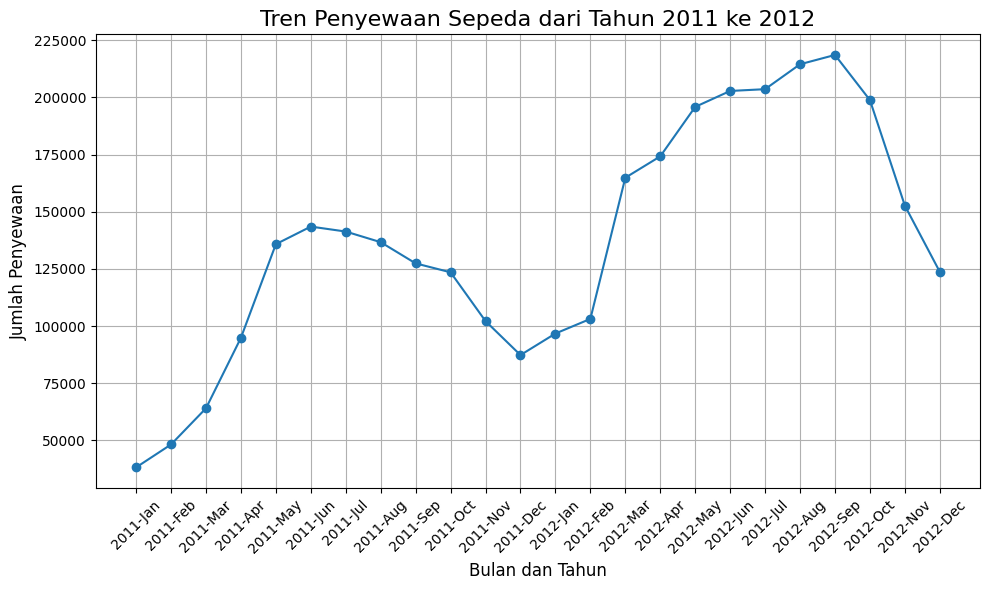

In [35]:
# Mengelompokkan data berdasarkan year dan month, lalu menjumlahkan total penyewaan
trends_data = day_df.groupby(['year', 'month'], observed=False)['count'].sum().reset_index()

# Membuat kolom baru untuk format 'year-month' agar lebih mudah dalam visualisasi
trends_data['year_month'] = trends_data['year'].astype(str) + '-' + trends_data['month'].astype(str).str.zfill(2)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(trends_data['year_month'], trends_data['count'], marker='o')
plt.title('Tren Penyewaan Sepeda dari Tahun 2011 ke 2012', fontsize=16)
plt.xlabel('Bulan dan Tahun', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Analisis tren penyewaan sepeda dari tahun 2011 ke 2012 menunjukkan adanya peningkatan yang signifikan. Pada tahun 2011, permintaan penyewaan paling banyak terjadi pada bulan Juni, sementara bulan Januari mencatatkan jumlah penyewa terendah. Memasuki tahun 2012, permintaan penyewaan mencapai puncaknya pada bulan September, tetapi setelah itu terdapat penurunan jumlah penyewaan pada bulan Oktober hingga Desember 2012. Bulan Januari juga mencatatkan jumlah penyewa yang paling sedikit pada tahun 2012.

### Pertanyaan 2: Bagaimana pengaruh faktor musim dan kondisi cuaca terhadap permintaan sewa sepeda?

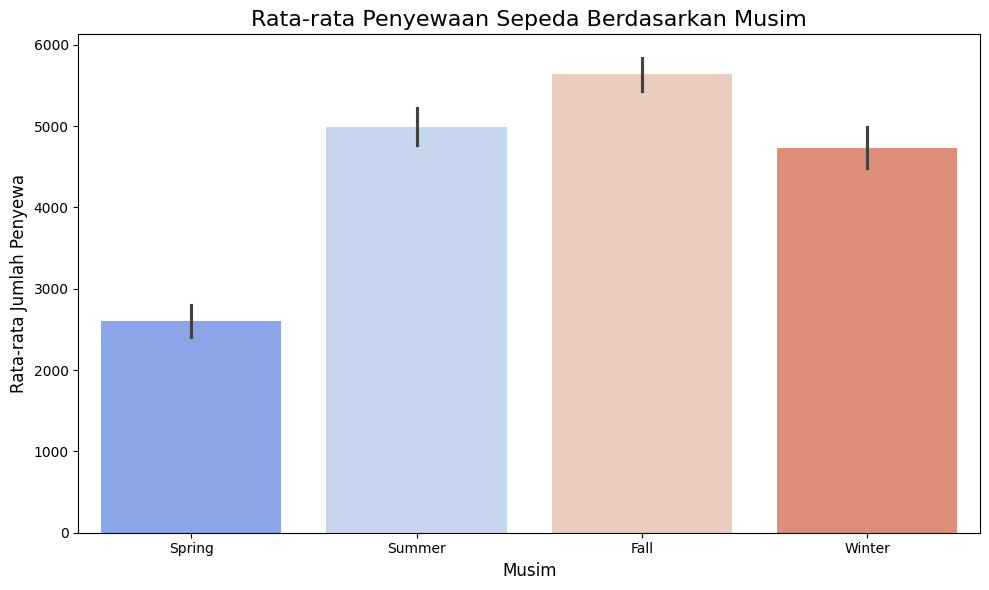

In [36]:
# Bar plot untuk penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='season', y='count', hue='season', palette='coolwarm', legend=False)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.tight_layout()
plt.show()

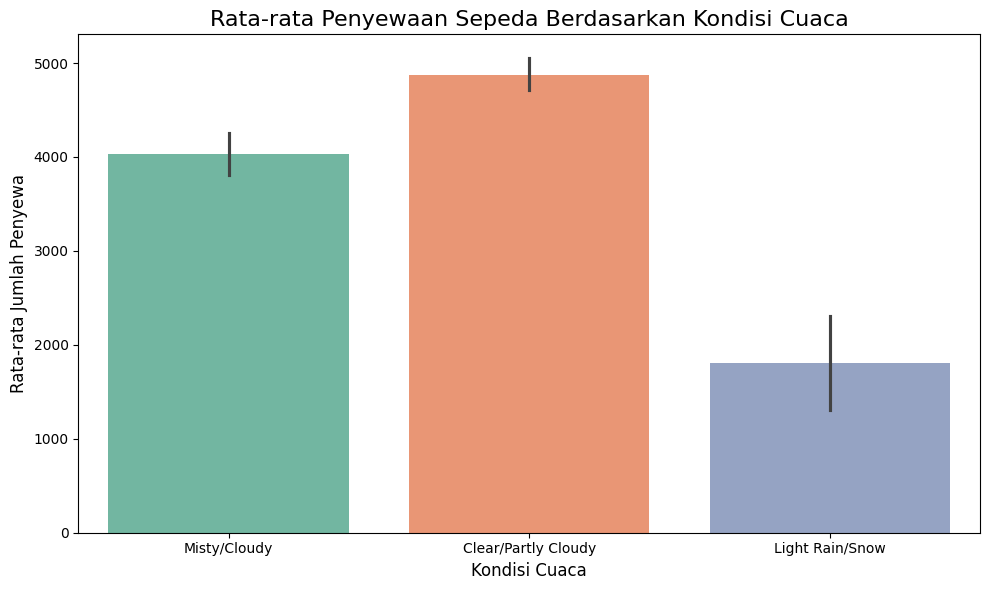

In [37]:
# Bar plot untuk penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weather', y='count', hue='weather', palette='Set2', legend=False)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi menggunakan box plot, terlihat bahwa kondisi musim dan cuaca mempengaruhi jumlah penyewaan sepeda. Musim Fall menunjukkan jumlah penyewa yang lebih banyak, diikuti oleh musim Summer dan Winter yang perbedaan jumlah penyewanya tidak terlalu jauh, sedangkan musim Spring memiliki jumlah penyewa yang paling sedikit. Dari segi kondisi cuaca, penyewaan sepeda paling banyak terjadi pada cuaca cerah, diikuti dengan cuaca berkabut atau mendung. Sementara itu, cuaca hujan merupakan kondisi yang paling sedikit diminati untuk permintaan sewa sepeda.

### Pertanyaan 3: Bagaimana penyewaan pada hari libur dibandingkan dengan hari kerja atau akhir pekan?

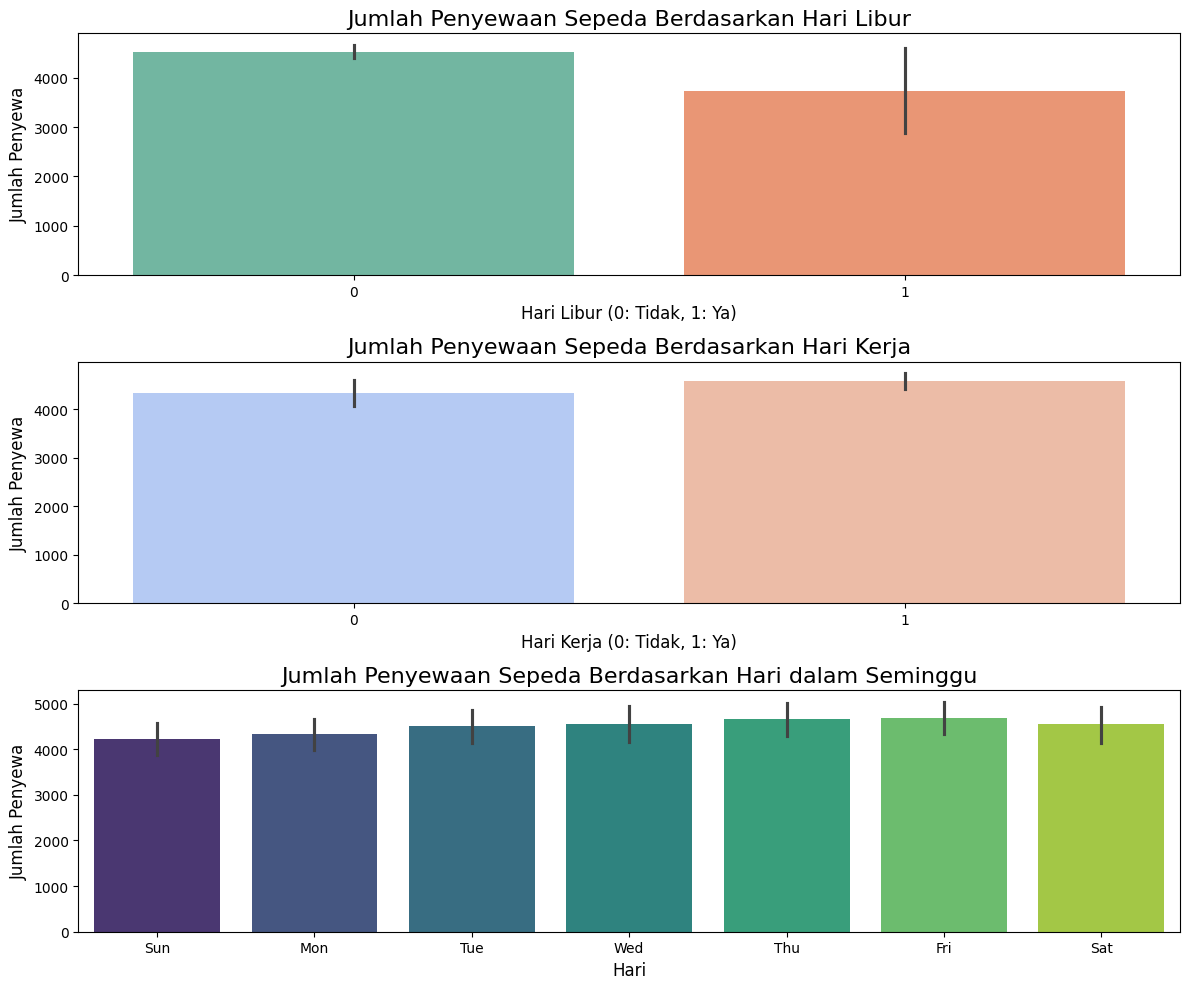

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,10))

# Berdasarkan holiday
sns.barplot(data=day_df, x='holiday', y='count', hue='holiday', palette='Set2', ax=axes[0], legend=False)
axes[0].set_title('Jumlah Penyewaan Sepeda Berdasarkan Hari Libur', fontsize=16)
axes[0].set_xlabel('Hari Libur (0: Tidak, 1: Ya)', fontsize=12)
axes[0].set_ylabel('Jumlah Penyewa', fontsize=12)

# Berdasarkan workingday
sns.barplot(data=day_df, x='workingday', y='count', hue='workingday', palette='coolwarm', ax=axes[1], legend=False)
axes[1].set_title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja', fontsize=16)
axes[1].set_xlabel('Hari Kerja (0: Tidak, 1: Ya)', fontsize=12)
axes[1].set_ylabel('Jumlah Penyewa', fontsize=12)

# Berdasarkan weekday
sns.barplot(data=day_df, x='weekday', y='count', hue='weekday', estimator='mean', palette='viridis', ax=axes[2], legend=False)
axes[2].set_title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
axes[2].set_xlabel('Hari', fontsize=12)
axes[2].set_ylabel('Jumlah Penyewa', fontsize=12)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi yang disajikan, diperoleh informasi sebagai berikut:

1. Jumlah penyewa sepeda pada hari biasa jauh lebih banyak dibandingkan dengan hari libur nasional.
2. Jumlah penyewa sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.
3. Dalam analisis mingguan, jumlah penyewa sepeda mencapai puncaknya pada hari Jumat, sedangkan hari Minggu mencatatkan jumlah penyewa terendah.

### Pertanyaan 4: Apakah terdapat perbedaan pola penyewaan sepeda antara pengguna casual dan pengguna terdaftar berdasarkan jenis hari, seperti hari kerja, akhir pekan, dan hari libur?

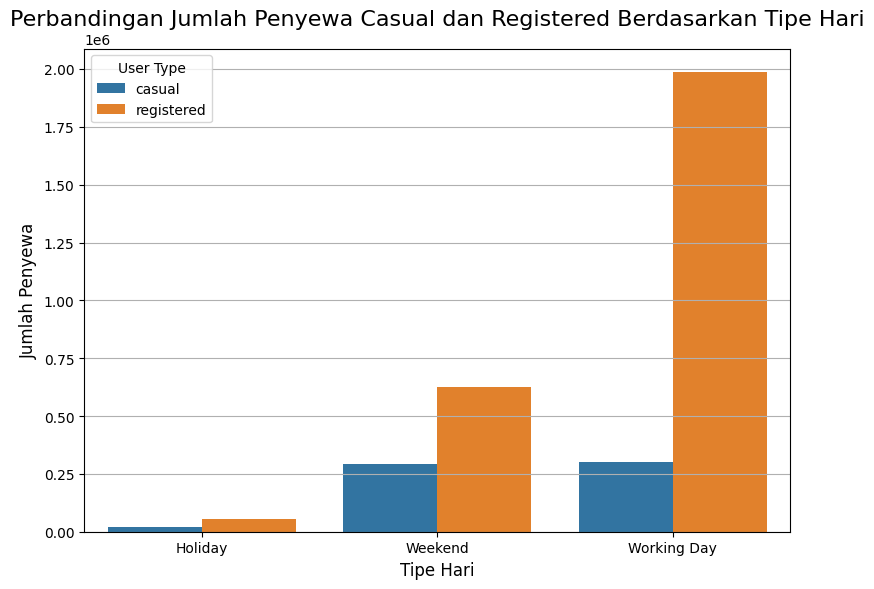

In [39]:
# Mengelompokkan data pengguna casual dan registered berdasarkan tipe hari
grouped_data = day_df.groupby('day_type')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(8, 6))
grouped_data_melt = grouped_data.melt(id_vars='day_type', value_vars=['casual', 'registered'], 
                                      var_name='User Type', value_name='Total Rentals')

sns.barplot(x='day_type', y='Total Rentals', hue='User Type', data=grouped_data_melt)
plt.title('Perbandingan Jumlah Penyewa Casual dan Registered Berdasarkan Tipe Hari', fontsize=16)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Jumlah Penyewa', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Berdasarkan analisis data, terdapat perbedaan pola penyewaan sepeda antara pengguna casual dan pengguna terdaftar berdasarkan jenis hari. Pengguna terdaftar menunjukkan jumlah penyewa yang jauh lebih tinggi pada hari kerja dan diikuti oleh akhir pekan, sedangkan jumlah penyewa pengguna terdaftar paling sedikit tercatat pada hari libur. Di sisi lain, pengguna casual menunjukkan jumlah penyewa yang relatif seimbang antara hari kerja dan akhir pekan, sementara itu hari libur menunjukkan jumlah terendah.

### Pertanyaan 5: Pada jam berapa permintaan penyewaan sepeda paling banyak?

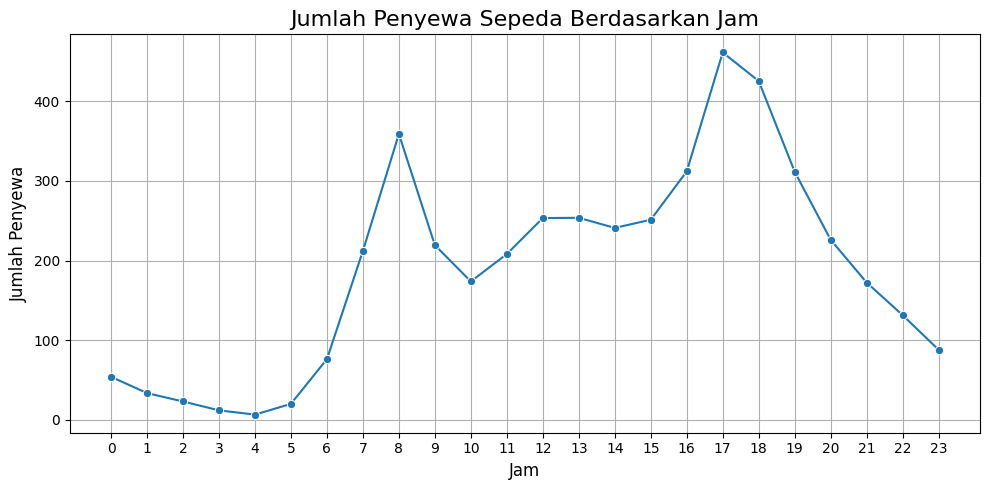

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(data=hour_df, x='hour', y='count', errorbar=None, marker='o')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewa', fontsize=12)
plt.xticks(range(0, 24))
plt.grid()
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, terlihat bahwa permintaan penyewaan sepeda paling tinggi terjadi pada jam 17:00 dan permintaan paling sedikit tercatat pada jam 00:00.

## Conclusion

- **Conclution pertanyaan 1:** Berdasarkan analisis tren penyewaan sepeda dari tahun 2011 ke 2012, dapat disimpulkan bahwa terjadi peningkatan permintaan yang signifikan pada tahun 2012, dengan puncaknya pada bulan September. Namun, tren ini diikuti oleh penurunan jumlah penyewaan pada bulan-bulan terakhir tahun tersebut, yaitu bulan Oktober hingga Desember.

- **Conclution pertanyaan 2:** Kondisi musim dan cuaca mempengaruhi jumlah permintaan penyewaan sepeda. Musim Fall menjadi periode yang paling diminati oleh pengguna, sementara musim Spring mencatatkan jumlah penyewa terendah. Selain itu, kondisi cuaca yang cerah secara signifikan meningkatkan minat pengguna untuk menyewa sepeda, sedangkan cuaca hujan cenderung mengurangi permintaan.

- **Conclution pertanyaan 3:** Dapat disimpulkan bahwa terdapat pola penyewaan sepeda berdasarkan jenis hari. Jumlah penyewa pada hari biasa jauh lebih tinggi dibandingkan dengan hari libur nasional, menunjukkan bahwa pengguna cenderung menyewa sepeda untuk keperluan sehari-hari. Selain itu, hari kerja juga mencatatkan jumlah penyewa yang lebih tinggi dibandingkan akhir pekan, dengan hari Jumat yang menjadi puncak permintaan. Sementara itu, hari Minggu mencatatkan jumlah penyewa terendah.

- **Conclution pertanyaan 4:** Dapat disimpulkan bahwa terdapat perbedaan signifikan dalam pola penyewaan sepeda antara pengguna casual dan pengguna terdaftar. Pengguna terdaftar lebih banyak menyewa sepeda pada hari kerja. Sebaliknya, pengguna casual memiliki pola yang lebih seimbang antara hari kerja dan akhir pekan. Di sisi lain, kedua jenis pengguna tersebut menunjukkan penurunan signifikan pada penyewaan sepeda di hari libur.

- **Conclution pertanyaan 5:** Berdasarkan analisis permintaan penyewaan sepeda berdasarkan jam, dapat disimpulkan bahwa waktu paling tinggi untuk penyewaan terjadi pada jam 17:00, yang kemungkinan besar dipengaruhi oleh kebiasaan pulang kerja dan kegiatan di sore hari. Sebaliknya, permintaan paling rendah tercatat pada jam 00:00, dimana kemungkinan pengguna sudah tidak melakukan aktivitas di luar rumah.

In [41]:
day_df.to_csv("clean_day.csv", index=False)

In [42]:
hour_df.to_csv("clean_hour.csv", index=False)